**INTRODUCTION**

In this kernel we will try to identify gender voices by using logistic regression. This kernel has been prepared with the purpose of practicing machine learning algorithms. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/voicegender/voice.csv


In [2]:
# import data
data = pd.read_csv('../input/voicegender/voice.csv')


In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


In [5]:
data.label.unique()

array(['male', 'female'], dtype=object)

In [6]:
data.label=[1 if each =="female" else 0 for each in data.label]

In [7]:
data.label.unique()

array([0, 1])

In [8]:
y = data.label.values
print(y)

[0 0 0 ... 1 1 1]


In [9]:
x_data = data.drop(["label"], axis=1)
# normalization of x_data
x = (x_data-np.min(x_data)) / (np.max(x_data)-np.min(x_data)).values
print(x)

      meanfreq        sd    median       Q25       Q75       IQR      skew  \
0     0.096419  0.473409  0.084125  0.060063  0.204956  0.254828  0.367853   
1     0.125828  0.505075  0.116900  0.077635  0.215683  0.246961  0.644279   
2     0.179222  0.675536  0.102873  0.034284  0.385912  0.457148  0.885255   
3     0.528261  0.554611  0.587559  0.389906  0.715802  0.407358  0.031549   
4     0.452195  0.627209  0.454272  0.317627  0.707515  0.474474  0.027742   
...        ...       ...       ...       ...       ...       ...       ...   
3163  0.436911  0.684871  0.570361  0.198513  0.686256  0.577704  0.046854   
3164  0.362946  0.731172  0.262871  0.171937  0.702595  0.621185  0.015961   
3165  0.484949  0.799042  0.690337  0.134329  0.786967  0.742124  0.050161   
3166  0.492516  0.745692  0.695311  0.175136  0.767804  0.681107  0.041908   
3167  0.595700  0.768964  0.687590  0.282629  0.901780  0.699289  0.045203   

          kurt    sp.ent       sfm      mode  centroid   meanfu

In [10]:
# train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (20, 2534)
x_test:  (20, 634)
y_train:  (2534,)
y_test:  (634,)


In [11]:
# parameter initialization and sigmoid function
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [12]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients

In [13]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
   
    

In [14]:
# prediction 
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction


In [15]:
# logistic regression : combining the methods we write before
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 30
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: 0.692360
Cost after iteration 10: 0.570539
Cost after iteration 20: 0.510995
Cost after iteration 30: 0.472210
Cost after iteration 40: 0.442623
Cost after iteration 50: 0.418237
Cost after iteration 60: 0.397345
Cost after iteration 70: 0.379065
Cost after iteration 80: 0.362863
Cost after iteration 90: 0.348376
Cost after iteration 100: 0.335335
Cost after iteration 110: 0.323530
Cost after iteration 120: 0.312793
Cost after iteration 130: 0.302985
Cost after iteration 140: 0.293990
Cost after iteration 150: 0.285712
Cost after iteration 160: 0.278069
Cost after iteration 170: 0.270989
Cost after iteration 180: 0.264414
Cost after iteration 190: 0.258291
Cost after iteration 200: 0.252575
Cost after iteration 210: 0.247227
Cost after iteration 220: 0.242212
Cost after iteration 230: 0.237501
Cost after iteration 240: 0.233067
Cost after iteration 250: 0.228886
Cost after iteration 260: 0.224937
Cost after iteration 270: 0.221202
Cost after iteration 280: 0.217

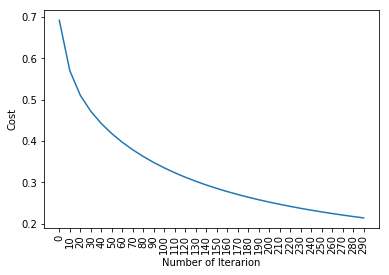

test accuracy: 97.1608832807571 %


In [16]:
logistic_regression(x_train,y_train,x_test,y_test,learning_rate=1, num_iterations=300)

Cost after iteration 0: 0.692360
Cost after iteration 10: 0.795272
Cost after iteration 20: 0.645705
Cost after iteration 30: 0.448314
Cost after iteration 40: 0.368932
Cost after iteration 50: 0.329773
Cost after iteration 60: 0.306344
Cost after iteration 70: 0.288460
Cost after iteration 80: 0.273378
Cost after iteration 90: 0.260396
Cost after iteration 100: 0.249096
Cost after iteration 110: 0.239171
Cost after iteration 120: 0.230384
Cost after iteration 130: 0.222553
Cost after iteration 140: 0.215529
Cost after iteration 150: 0.209195
Cost after iteration 160: 0.203455
Cost after iteration 170: 0.198230
Cost after iteration 180: 0.193453
Cost after iteration 190: 0.189071
Cost after iteration 200: 0.185035
Cost after iteration 210: 0.181308
Cost after iteration 220: 0.177855
Cost after iteration 230: 0.174646
Cost after iteration 240: 0.171658
Cost after iteration 250: 0.168868
Cost after iteration 260: 0.166257
Cost after iteration 270: 0.163809
Cost after iteration 280: 0.161

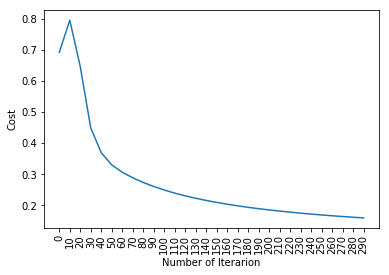

test accuracy: 97.94952681388013 %


In [17]:
logistic_regression(x_train,y_train,x_test,y_test,learning_rate=2, num_iterations=300)

Cost after iteration 0: 0.692360
Cost after iteration 10: 0.795272
Cost after iteration 20: 0.645705
Cost after iteration 30: 0.448314
Cost after iteration 40: 0.368932
Cost after iteration 50: 0.329773
Cost after iteration 60: 0.306344
Cost after iteration 70: 0.288460
Cost after iteration 80: 0.273378
Cost after iteration 90: 0.260396
Cost after iteration 100: 0.249096
Cost after iteration 110: 0.239171
Cost after iteration 120: 0.230384
Cost after iteration 130: 0.222553
Cost after iteration 140: 0.215529
Cost after iteration 150: 0.209195
Cost after iteration 160: 0.203455
Cost after iteration 170: 0.198230
Cost after iteration 180: 0.193453
Cost after iteration 190: 0.189071
Cost after iteration 200: 0.185035
Cost after iteration 210: 0.181308
Cost after iteration 220: 0.177855
Cost after iteration 230: 0.174646
Cost after iteration 240: 0.171658
Cost after iteration 250: 0.168868
Cost after iteration 260: 0.166257
Cost after iteration 270: 0.163809
Cost after iteration 280: 0.161

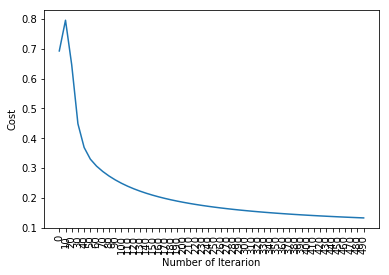

test accuracy: 97.94952681388013 %


In [18]:
logistic_regression(x_train,y_train,x_test,y_test,learning_rate=2, num_iterations=500)

In [19]:
#%% logistic regression with sklearn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T) 
print("test accuracy: {}".format(lr.score(x_test.T,y_test.T)))
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

test accuracy: 0.9810725552050473


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We achieve the highest test accuracy with sklearn that is %98,1